In [12]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

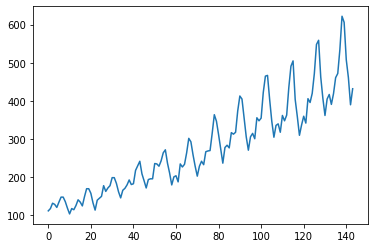

In [13]:
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], delimiter=";", engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [14]:
dataset = dataset.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [15]:
test_data_size = 12

train_data = dataset[:-test_data_size]
test_data = dataset[-test_data_size:]

In [16]:
train_data_normalized = torch.FloatTensor(train_data).view(-1)

In [17]:
train_data_normalized

tensor([0.0154, 0.0270, 0.0541, 0.0483, 0.0328, 0.0598, 0.0849, 0.0849, 0.0618,
        0.0290, 0.0000, 0.0270, 0.0212, 0.0425, 0.0714, 0.0598, 0.0405, 0.0869,
        0.1274, 0.1274, 0.1042, 0.0560, 0.0193, 0.0695, 0.0792, 0.0888, 0.1429,
        0.1139, 0.1313, 0.1429, 0.1834, 0.1834, 0.1544, 0.1120, 0.0811, 0.1197,
        0.1293, 0.1467, 0.1718, 0.1486, 0.1525, 0.2201, 0.2432, 0.2664, 0.2027,
        0.1680, 0.1313, 0.1737, 0.1776, 0.1776, 0.2548, 0.2529, 0.2413, 0.2683,
        0.3089, 0.3243, 0.2568, 0.2066, 0.1467, 0.1873, 0.1931, 0.1622, 0.2529,
        0.2375, 0.2510, 0.3089, 0.3822, 0.3649, 0.2992, 0.2413, 0.1911, 0.2413,
        0.2664, 0.2490, 0.3147, 0.3185, 0.3205, 0.4073, 0.5019, 0.4691, 0.4015,
        0.3282, 0.2568, 0.3359, 0.3475, 0.3340, 0.4112, 0.4035, 0.4131, 0.5212,
        0.5965, 0.5811, 0.4846, 0.3900, 0.3224, 0.3900, 0.4073, 0.3803, 0.4865,
        0.4710, 0.4846, 0.6139, 0.6969, 0.7008, 0.5792, 0.4691, 0.3880, 0.4479,
        0.4556, 0.4131, 0.4981, 0.4710, 

In [18]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [19]:
train_window = 12

In [20]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [26]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        print(input_seq.view(len(input_seq), 1, -1).size())
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [27]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
epochs = 150
loss_hist_train = []
for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

tensor([0.0154, 0.0270, 0.0541, 0.0483, 0.0328, 0.0598, 0.0849, 0.0849, 0.0618,
        0.0290, 0.0000, 0.0270])
torch.Size([12, 1, 1])
tensor([0.0270, 0.0541, 0.0483, 0.0328, 0.0598, 0.0849, 0.0849, 0.0618, 0.0290,
        0.0000, 0.0270, 0.0212])
torch.Size([12, 1, 1])
tensor([0.0541, 0.0483, 0.0328, 0.0598, 0.0849, 0.0849, 0.0618, 0.0290, 0.0000,
        0.0270, 0.0212, 0.0425])
torch.Size([12, 1, 1])
tensor([0.0483, 0.0328, 0.0598, 0.0849, 0.0849, 0.0618, 0.0290, 0.0000, 0.0270,
        0.0212, 0.0425, 0.0714])
torch.Size([12, 1, 1])
tensor([0.0328, 0.0598, 0.0849, 0.0849, 0.0618, 0.0290, 0.0000, 0.0270, 0.0212,
        0.0425, 0.0714, 0.0598])
torch.Size([12, 1, 1])
tensor([0.0598, 0.0849, 0.0849, 0.0618, 0.0290, 0.0000, 0.0270, 0.0212, 0.0425,
        0.0714, 0.0598, 0.0405])
torch.Size([12, 1, 1])
tensor([0.0849, 0.0849, 0.0618, 0.0290, 0.0000, 0.0270, 0.0212, 0.0425, 0.0714,
        0.0598, 0.0405, 0.0869])
torch.Size([12, 1, 1])
tensor([0.0849, 0.0618, 0.0290, 0.0000, 0.0270, 

KeyboardInterrupt: 

In [36]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.4942084848880768, 0.45945945382118225, 0.5830116271972656, 0.5637065172195435, 0.6100386381149292, 0.7104246616363525, 0.8571429252624512, 0.8783783912658691, 0.6930501461029053, 0.584942102432251, 0.49806949496269226, 0.5810810327529907]


In [37]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [41]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[408.44194819]
 [363.97859407]
 [459.57011702]
 [417.54127294]
 [465.60140337]
 [553.19831646]
 [709.9681041 ]
 [834.88764615]
 [781.92950382]
 [675.66161232]
 [513.5784795 ]
 [396.92818228]]


In [42]:
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


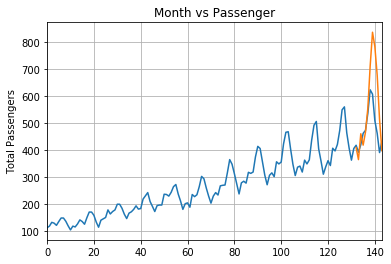

In [53]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(dataset)
plt.plot(x,actual_predictions)
plt.show()